## Table of Contents

1. Importing Libraries
2. Importing Dataframe
3. Data Cleaning
4. The Elbow Technique
5. K-Means Clustering
6. Visualizations
7. Interpreting Results
8. Descriptive Statistics

## 1. Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler 

In [2]:
# This option ensures the graph created are displayed in this notebook without the need to "call" them specifically.

%matplotlib inline

## 2. Importing Dataframe


In [3]:
# Defining path
path = r'/Users/sina/Desktop/Projects/A6'

In [5]:
# Importing dataframe 
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Complete_dataset.csv'), index_col = False)

In [6]:
df.head()

,Country Rank,Year,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Generosity (Donations to Charity),Happiness Status
0,1,2015,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Happy Country
1,2,2015,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Happy Country
2,3,2015,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Happy Country
3,4,2015,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Happy Country
4,5,2015,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,Happy Country


In [7]:
df.shape

(1228, 12)

## 3. Data Cleaning

In [11]:
# Remove the categorical columns such as Country, Region, Continent, and Happiness Status
# Create a subset to hold the remaining numerical columns
df_subset = df.drop(columns = ['Country', 'Region', 'Happiness Status'])

In [12]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Rank                       1228 non-null   int64  
 1   Year                               1228 non-null   int64  
 2   Happiness Score                    1228 non-null   float64
 3   Economy (GDP per Capita)           1228 non-null   float64
 4   Family (Social Support)            1228 non-null   float64
 5   Health (Life Expectancy)           1228 non-null   float64
 6   Freedom (Life Choices)             1228 non-null   float64
 7   Trust (Government Corruption)      1228 non-null   float64
 8   Generosity (Donations to Charity)  1228 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 86.5 KB


In [10]:
df_dup.shape

(1228,)

In [13]:
column2 = ['Country Rank','Year', 'Happiness Score', 'Economy (GDP per Capita)', 'Family (Social Support)', 'Health (Life Expectancy)', 'Freedom (Life Choices)', 'Trust (Government Corruption)', 'Generosity (Donations to Charity)']


In [14]:
#Defining Scaler 
scaler = StandardScaler()

In [15]:
#Scaling data subset 
df_scaled = pd.DataFrame(scaler.fit_transform(df_subset), columns=column2) 

In [16]:
df_scaled.head()

,Country Rank,Year,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Generosity (Donations to Charity)
0,-1.719325,-1.509902,1.935081,0.970620,0.959371,1.381483,1.454472,2.608323,0.823147
1,-1.696829,-1.509902,1.911758,0.753675,1.119370,1.408074,1.216014,0.096674,2.031391
2,-1.674334,-1.509902,1.881258,0.807019,0.992967,1.104409,1.349563,3.183964,1.209470
3,-1.651839,-1.509902,1.876773,1.114552,0.903044,1.148258,1.481428,2.114259,1.257966
4,-1.629343,-1.509902,1.791553,0.808885,0.877733,1.232969,1.243230,1.794268,2.220266


In [17]:
df_subset.head()

,Country Rank,Year,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Generosity (Donations to Charity)
0,1,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,3,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,4,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


## 4. The Elbow Technique

In [18]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [19]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-11052.0,
 -7321.288888813811,
 -6016.694835086315,
 -5426.093416910477,
 -4987.0607567916,
 -4620.637632524111,
 -4284.299992933826,
 -4089.0590805111765,
 -3913.828340842417]

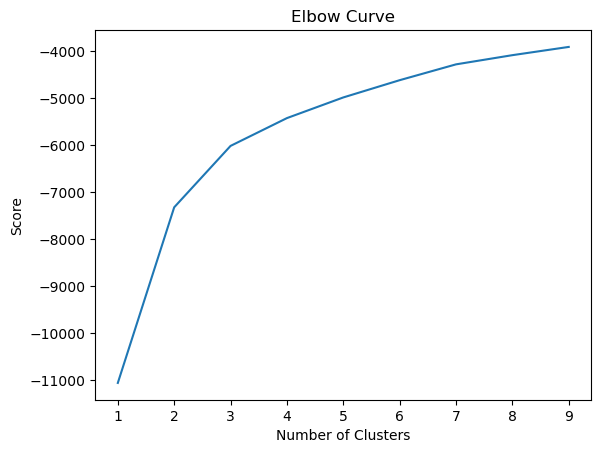

In [20]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The results of this elbow curve show that after 3,  the curve gradually plateaus. In this scenario, the optimal cluster count for this analysis is *3*.

## 5. K-Means Clustering

In [28]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [29]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

KMeans(n_clusters=3)

In [30]:
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

In [31]:
df_scaled.head()

,Country Rank,Year,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Generosity (Donations to Charity),clusters
0,-1.719325,-1.509902,1.935081,0.970620,0.959371,1.381483,1.454472,2.608323,0.823147,2
1,-1.696829,-1.509902,1.911758,0.753675,1.119370,1.408074,1.216014,0.096674,2.031391,2
2,-1.674334,-1.509902,1.881258,0.807019,0.992967,1.104409,1.349563,3.183964,1.209470,2
3,-1.651839,-1.509902,1.876773,1.114552,0.903044,1.148258,1.481428,2.114259,1.257966,2
4,-1.629343,-1.509902,1.791553,0.808885,0.877733,1.232969,1.243230,1.794268,2.220266,2


In [32]:
df_scaled['clusters'].value_counts()

0    444
1    437
2    347
Name: clusters, dtype: int64

## 6. Visualizations

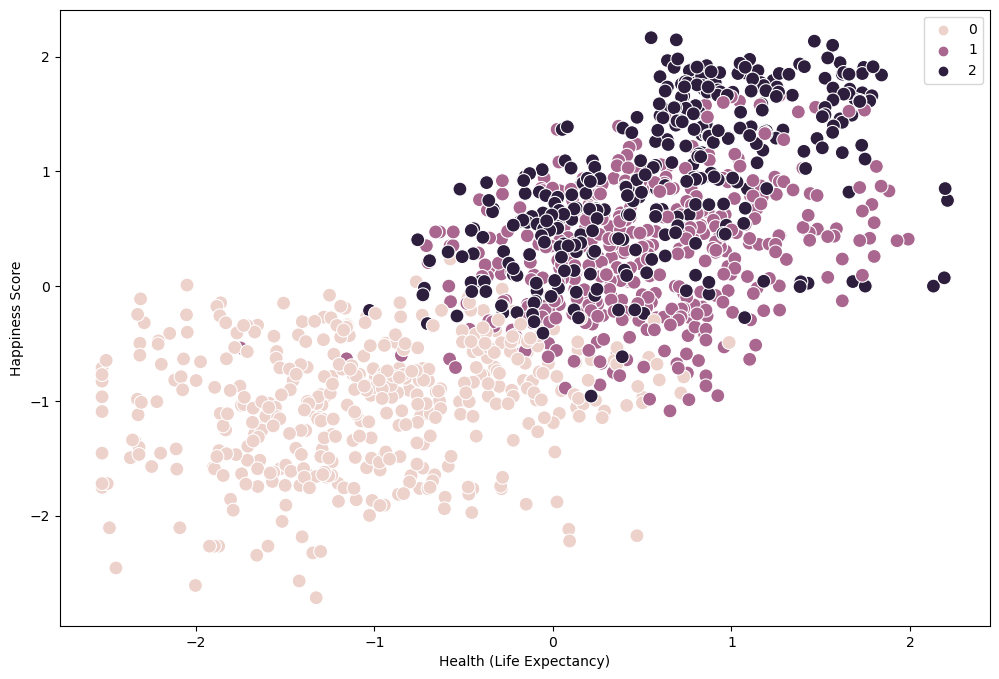

In [33]:
# Plot the clusters for the "Happiness Score" and "Health (Life Expectancy)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Health (Life Expectancy)'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Health (Life Expectancy)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

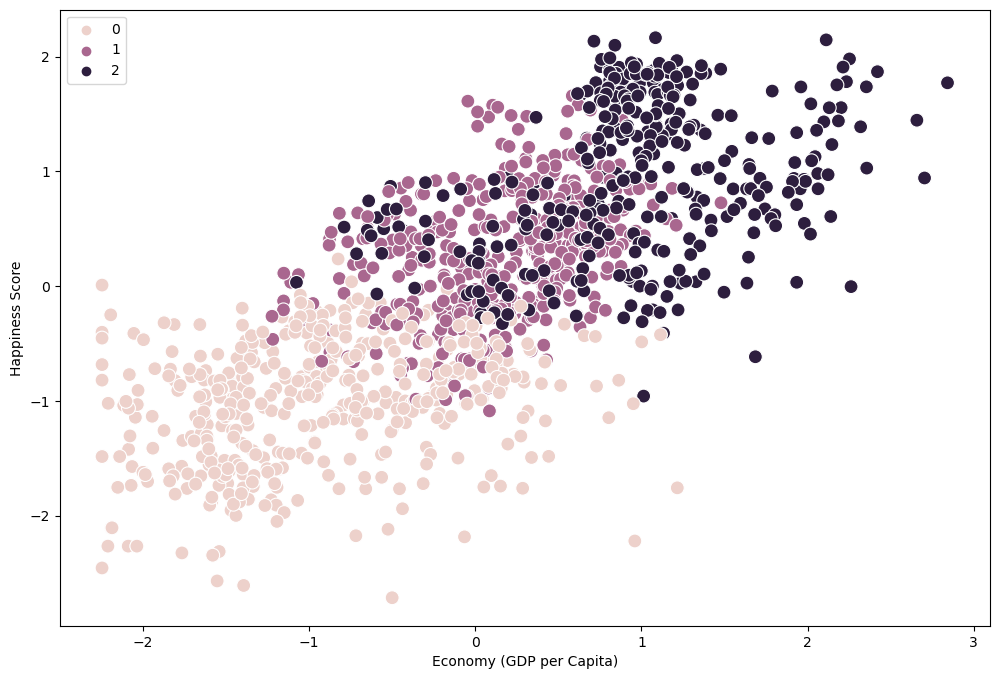

In [34]:
# Plot the clusters for the "Happiness Score" and "Economy (GDP per Capita)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Economy (GDP per Capita)'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy (GDP per Capita)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

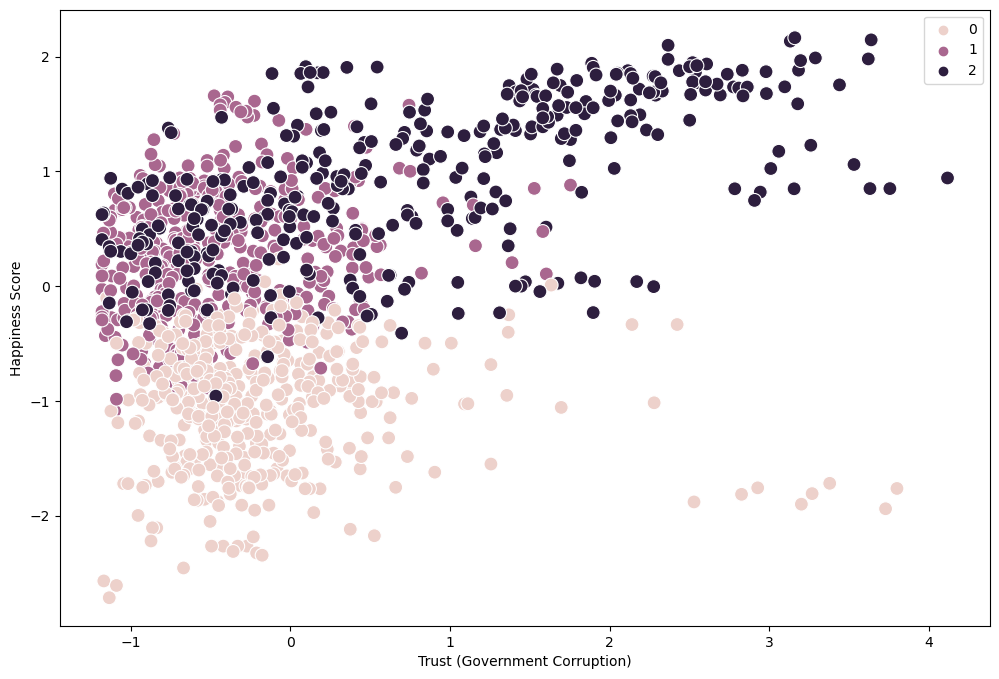

In [35]:
# Plot the clusters for the "Happiness Score" and "Trust (Government Corruption)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Trust (Government Corruption)'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Trust (Government Corruption)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

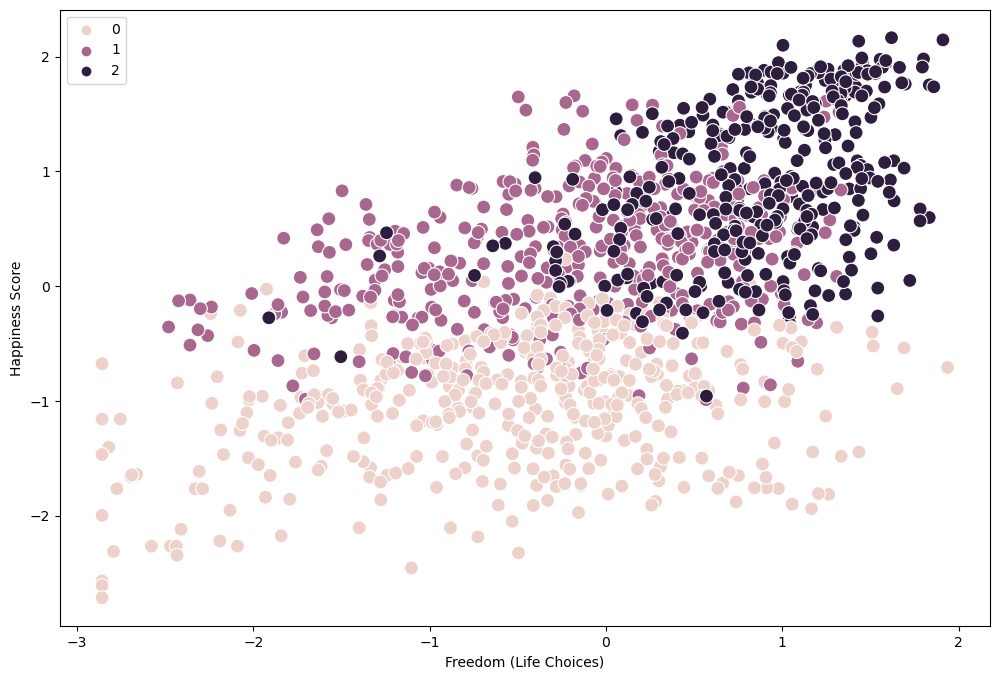

In [36]:
# Plot the clusters for the "Happiness Score" and "Freedom (Life Choices)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Freedom (Life Choices)'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Freedom (Life Choices)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

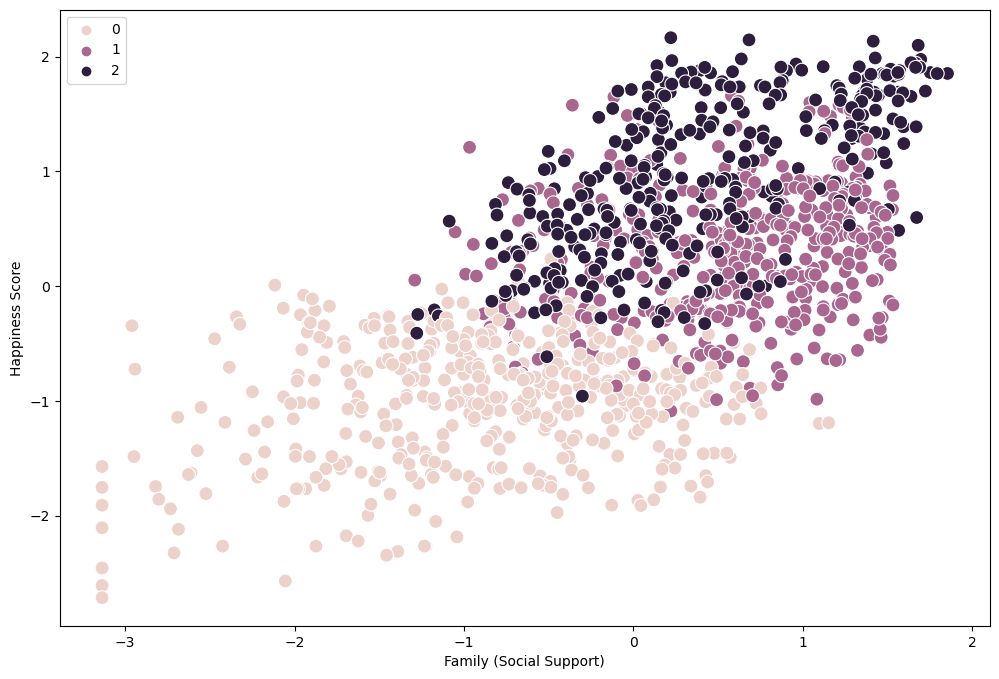

In [38]:
# Plot the clusters for the "Happiness Score" and "Family (Social Support)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Family (Social Support)'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Family (Social Support)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

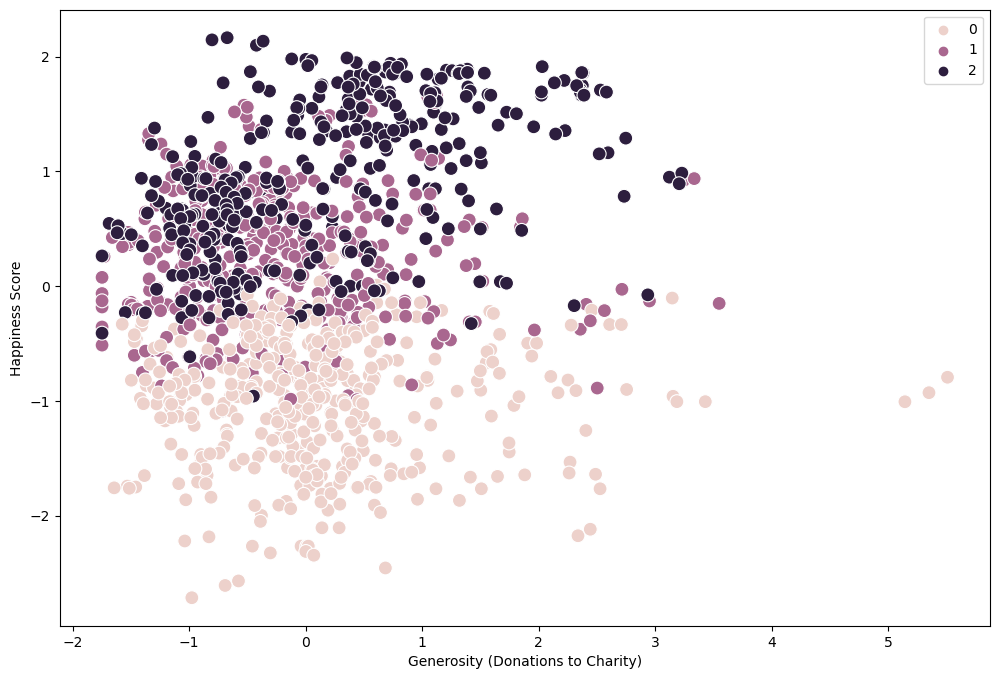

In [50]:
# Plot the clusters for the "Happiness Score" and "Family (Social Support)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Generosity (Donations to Charity)'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Generosity (Donations to Charity)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

## 7. Interpreting Results from Scatterplots


1. Happiness Score vs. Economy: The higer the economy score the higher the happiness score. The pink cluster (coded as "0" in the legend) is showing that a lower score in economy will equate to an "unhappy country". The purple cluster (coded as "1" in the legend) is showing that countries with an economy score lower than 1 are in the "somewhat happy country" status. The dark purple cluster (coded as "2" in the legend) is showing that countries with a happiness score above 1 have an economy score higher than 1 equates to a "happy country".

2. Happiness Score vs. Trust Government Corruption: The pink cluster (coded as "1" in the legend) is showing that the "unhappy countries" do not have much trust in their government. "Somewhat happy countries" (purple cluster) are also within the same range of a Trust score between -1 - 0 (Low trust in government). We see a slight difference in countries with "happy countries" (dark purple cluster) demonstrating slightly more trust in their government with data points varying between 0 - 2.

3. Happiness Score vs. Freedom (Life Choices): This result of this scatterplot were not shocking. The purple cluster (coded as "1" in the legend) is showing the "somewhat happy countries" have freedom scores that range between -1 through 1. The dark purple cluster (coded as "2" in the legend) is showing that "happy countries" have slightly more freedom than those countries with lower happiness scores. The pink cluster (coded as "0" in the legend) is showing that "unhappy countries" don't have differences in Freedom scores in comparison to the purple cluster (Somewhat happy countries). 

4. Happiness Score vs. Health (Life Expectancy): The higer the health score the higher the happiness score. The pink cluster (coded as "0" in the legend) is showing that a lower score in health will equate to an "unhappy country". The purple cluster (coded as "1" in the legend) is showing that countries with an health score between -1 and 2 are in the "somewhat happy country" status. The dark purple cluster (coded as "2" in the legend) is showing that countries with a happiness score above 0 have an health score higher than 1 equates to a "happy country".

5. Happiness Score vs. Family (Social Support): The pink cluster (coded as "0" in the legend) is showing that a lower score in Family or Social support will equate to an "unhappy country". The purple cluster (coded as "1" in the legend) is showing that countries with an Family score lower than 1.5 are in the "somewhat happy country" status. The dark purple cluster (coded as "2" in the legend) is showing that countries with a happiness score have an family score a bit higher than "somewhat happy countries." 

## 8. Descriptive Statistics

In [47]:
# Create a 'cluster' column based on the clusters for easier interpretation

df_subset.loc[df_scaled['clusters'] == 2, 'cluster'] = 'dark purple'
df_subset.loc[df_scaled['clusters'] == 1, 'cluster'] = 'purple'
df_subset.loc[df_scaled['clusters'] == 0, 'cluster'] = 'pink'

In [48]:
df_subset.groupby('cluster').agg({'Country Rank':['mean', 'median'],
                        'Economy (GDP per Capita)':['mean', 'median'], 
                         'Family (Social Support)':['mean', 'median'], 
                         'Health (Life Expectancy)':['mean', 'median'],
                          'Freedom (Life Choices)':['mean', 'median'], 
                          'Trust (Government Corruption)':['mean', 'median'], 
                          'Generosity (Donations to Charity)':['mean', 'median']})

Country Rank        Economy (GDP per Capita)            \
                    mean median                     mean    median   
cluster                                                              
dark purple    35.734870   28.0                 1.400888  1.405000   
pink          124.416667  126.0                 0.571830  0.543817   
purple         62.798627   62.0                 1.046734  1.063530   

            Family (Social Support)           Health (Life Expectancy)  \
                               mean    median                     mean   
cluster                                                                  
dark purple                1.169635  1.142351                 0.762005   
pink                       0.745807  0.759620                 0.365483   
purple                     1.217407  1.239000                 0.733286   

                     Freedom (Life Choices)         \
              median                   mean median   
cluster                                              
dark purple  0.77600               0.577135  0.589   
pink         0.35787               0.358915  0.381   
purple       0.72900               0.416606  0.435   

            Trust (Government Corruption)            \
                                     mean    median   
cluster                                               
dark purple                      0.222345  0.208724   
pink                             0.108506  0.091895   
purple                           0.080583  0.068250   

            Generosity (Donations to Charity)            
                                         mean    median  
cluster                                                  
dark purple                          0.224400  0.217000  
pink                                 0.212946  0.201725  
purple                               0.172329  0.155579

#### With these descriptive statistics, we can state a few facts:

The dark purple cluster has the best statistics: Especially the Economy score has a median score of 1.4 which is higher than the other clusters. 

Freedom, Trust are following the same pattern as Economy, which means, dark purple is higher, then purple and pink. 

However, Family (Social Support) is interesting:  purple cluster is a bit higher than dark purple.  If you consider that the more economically developed countries are generally more individualized, then that is a bit understandable. 

Also, Generosity Score is showing that it doesn't relate to much to Happiness score.  Dark p


Limitations: Some limitations in this dataset are that the dataset is not that large. It will be interesting to see how this data evolves over the next decade.